# GISCO API usage

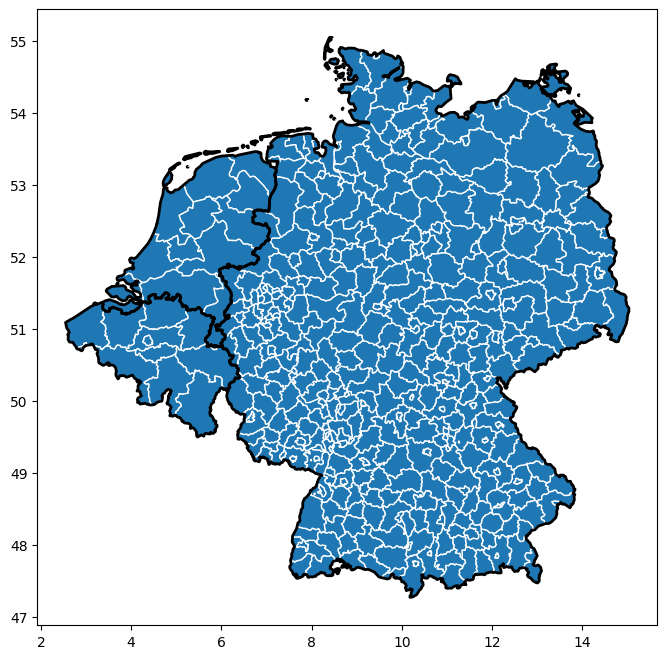

In [6]:
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

def getNUTSGeoPandasData(countries_nuts,
                         resolution="03M",
                         nuts_year="2016",
                         projection="4326"):
  nuts_map_source = "https://gisco-services.ec.europa.eu/distribution/v2/nuts/geojson"
  geojson_file = "NUTS_RG_" + resolution + "_" + nuts_year + "_" + projection + ".geojson"

  geo_nutsx_df = gpd.read_file(nuts_map_source + '/' + geojson_file)
  geo_nutsx_df = geo_nutsx_df.drop(columns=["id", "FID"])
  geo_nutsx_df = geo_nutsx_df.rename(columns={ "CNTR_CODE" : "COUNTRY"})
  filters = None
  for cn in countries_nuts:
    if (filters is None):
      filters = (geo_nutsx_df["COUNTRY"] == cn) & (geo_nutsx_df["LEVL_CODE"] == countries_nuts[cn])
    else:
      filters |= (geo_nutsx_df["COUNTRY"] == cn) & (geo_nutsx_df["LEVL_CODE"] == countries_nuts[cn])

  geo_nutsx_df = geo_nutsx_df[filters]
  return geo_nutsx_df

def plotStaticMap(geo_nuts0_df, geo_nutsx_df):
  fig, ax = plt.subplots(1, 1, figsize=(8, 8))
  base = geo_nutsx_df.plot(ax=ax,
                           linewidth=1.0, edgecolor='white')
  geo_nuts0_df.plot(ax=base, edgecolor='black', linewidth=2.0, facecolor="none")

countries_nuts0 = { 
  "BE" : 0,
  "DE" : 0,
  "NL" : 0
}
# nuts level of yield data
countries_nutsx = { 
  "BE" : 2,
  "DE" : 3,
  "NL" : 2
}

geo_nuts0_df = getNUTSGeoPandasData(countries_nuts0)
geo_nutsx_df = getNUTSGeoPandasData(countries_nutsx)
plotStaticMap(geo_nuts0_df, geo_nutsx_df)